In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/ml-datasets/data.csv')

In [3]:
df.head()

,sentence,label
0,Ok brokeback mountain is such a horrible movie.,0
1,Brokeback Mountain was so awesome.,1
2,friday hung out with kelsie and we went and sa...,0
3,I am going to start reading the Harry Potter s...,1
4,"Is it just me, or does Harry Potter suck?...",0


In [4]:
df.describe()

,label
count,5668.000000
mean,0.565279
std,0.495764
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
lens=[len(i.split()) for i in df.sentence]

(array([2113., 1092.,  912.,  692.,  276.,  253.,  155.,   29.,  142.,
           4.]),
 array([ 3. ,  6.7, 10.4, 14.1, 17.8, 21.5, 25.2, 28.9, 32.6, 36.3, 40. ]),
 <BarContainer object of 10 artists>)

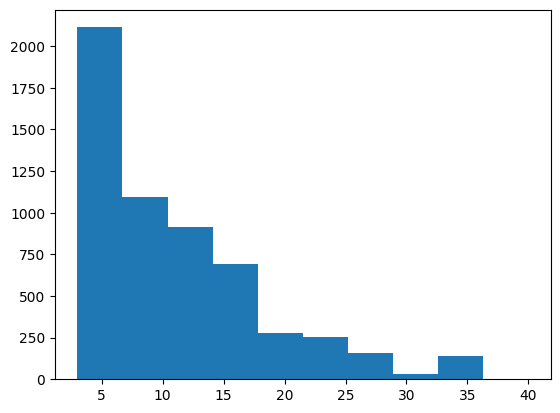

In [6]:
import matplotlib.pyplot as plt
plt.hist(lens)

In [7]:
!pip install transformers

In [8]:
#for pytorch
import torch
import torch.nn as nn
device = torch.device("cuda")

#for BERT
import transformers
from transformers import AutoModel, BertTokenizerFast

**Decision Tree & Logistic Regresion:**

In [11]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(df['sentence'], df['label'], test_size=0.2, random_state=42)

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       492
           1       0.98      1.00      0.99       642

    accuracy                           0.98      1134
   macro avg       0.99      0.98      0.98      1134
weighted avg       0.98      0.98      0.98      1134



In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)
y_pred_dt = dt.predict(X_test_tfidf)

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       492
           1       0.98      0.99      0.99       642

    accuracy                           0.98      1134
   macro avg       0.98      0.98      0.98      1134
weighted avg       0.98      0.98      0.98      1134



**BERT Model:**

In [14]:
# split into train, validation and test sets in the ration 70 : 15 : 15

train_text, temp_text, train_labels, temp_labels = train_test_split(df['sentence'], df['label'],
                                                                    random_state=2021,
                                                                    test_size=0.3,
                                                                    stratify=df['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2021,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

In [15]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [16]:
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(array([1504.,  701.,  572.,  521.,  164.,  215.,  117.,   63.,  104.,
           6.]),
 array([ 3. ,  6.5, 10. , 13.5, 17. , 20.5, 24. , 27.5, 31. , 34.5, 38. ]),
 <BarContainer object of 10 artists>)

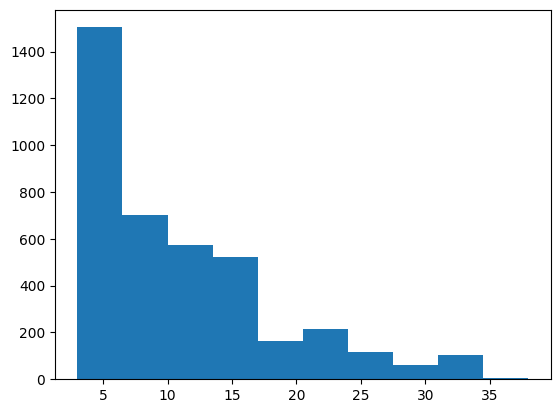

In [17]:
train_lens=[len(i.split()) for i in train_text]
plt.hist(train_lens)

As per the above graph, as most of the texts are having around 17 words, we would consider 17 as the padding length.

In [18]:
pad_len=17

In [19]:
# tokenize and encode sequences
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = pad_len,
    pad_to_max_length=True,
    truncation=True
)

tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = pad_len,
    pad_to_max_length=True,
    truncation=True
)

tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = pad_len,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [20]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [21]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 64

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [22]:
# freeze the BERT architecture

for param in bert.parameters():
    param.requires_grad = False

Below, we define the BERT architecture, i.e., define our own layers in addition to the actual BERT architecture

In [23]:
class BERT_architecture(nn.Module):

    def __init__(self, bert):

      super(BERT_architecture, self).__init__()

      self.bert = bert

      # dropout layer
      self.dropout = nn.Dropout(0.2)

      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)

      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)

      # apply softmax activation
      x = self.softmax(x)

      return x

In [24]:
# pass the pre-trained BERT to our define architecture
model = BERT_architecture(bert)

# push the model to GPU
model = model.to(device)

In [25]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)  # learning rate

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [26]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels
                                     )
print("class weights are {} for {}".format(class_weights,np.unique(train_labels)))

class weights are [1.14985507 0.88470116] for [0 1]


In [27]:
#count of both the categories of training labels
pd.value_counts(train_labels)

<ipython-input-27-79f56b9380c8>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_labels)


,count
label,
1,2242
0,1725


In [28]:
#wrap class weights in tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push weights to GPU
weights = weights.to(device)

# define loss function
# add weights to handle the "imbalance" in the dataset
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 10

In [29]:
# function to train the model
def train():

  model.train()

  total_loss, total_accuracy = 0, 0

  # empty list to save model predictions
  total_preds=[]

  # iterate over batches
  for step,batch in enumerate(train_dataloader):

    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]

    sent_id, mask, labels = batch

    # clear previously calculated gradients
    model.zero_grad()

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)

  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [30]:
# function for evaluating the model
def evaluate():

  print("\nEvaluating...")

  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0

  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):

    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:

      # # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)

      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():

      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader)

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [31]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()

    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print('\nTraining Loss: {}'.format(train_loss))
    print('Validation Loss: {}'.format(valid_loss))


 Epoch 1 / 10
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6897329120866714
Validation Loss: 0.6823262274265289

 Epoch 2 / 10
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6851078435297935
Validation Loss: 0.6755675205162593

 Epoch 3 / 10
  Batch    50  of     62.

Evaluating...

Training Loss: 0.679775046725427
Validation Loss: 0.6706126928329468

 Epoch 4 / 10
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6786561233382071
Validation Loss: 0.6662305593490601

 Epoch 5 / 10
  Batch    50  of     62.

Evaluating...

Training Loss: 0.671824844614152
Validation Loss: 0.6607732219355447

 Epoch 6 / 10
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6701476737376182
Validation Loss: 0.6563083486897605

 Epoch 7 / 10
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6664355522201907
Validation Loss: 0.652059908424105

 Epoch 8 / 10
  Batch    50  of     62.

Evaluating...

Training Loss: 0.661640360470741
Validation Loss: 0.65126

In [32]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<ipython-input-32-5a29cc8ec3f6>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


<All keys matched successfully>

In [33]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [34]:
from sklearn.metrics import classification_report

In [35]:
pred = np.argmax(preds, axis = 1)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.52      0.91      0.66       370
           1       0.84      0.35      0.50       481

    accuracy                           0.60       851
   macro avg       0.68      0.63      0.58       851
weighted avg       0.70      0.60      0.57       851



**Comparison of Models:**

In [36]:
# Ensure `y_pred_bert` is available from your BERT model's predictions
print("Accuracy Scores:")
print(f"BERT: {accuracy_score(test_y, pred):.4f}")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Decision Tree: {accuracy_score(y_test, y_pred_dt):.4f}")

Accuracy Scores:
BERT: 0.5969
Logistic Regression: 0.9841
Decision Tree: 0.9832


In [38]:
# Ensure y_pred_bert exists from your BERT model predictions
from sklearn.metrics import precision_score, recall_score, f1_score
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

bert_scores = [
    accuracy_score(test_y, pred),
    precision_score(test_y, pred, average='weighted'),
    recall_score(test_y, pred, average='weighted'),
    f1_score(test_y, pred, average='weighted')
]

log_reg_scores = [
    accuracy_score(y_test, y_pred_log_reg),
    precision_score(y_test, y_pred_log_reg, average='weighted'),
    recall_score(y_test, y_pred_log_reg, average='weighted'),
    f1_score(y_test, y_pred_log_reg, average='weighted')
]

dt_scores = [
    accuracy_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_dt, average='weighted'),
    recall_score(y_test, y_pred_dt, average='weighted'),
    f1_score(y_test, y_pred_dt, average='weighted')
]

# Combine into a NumPy array for plotting
scores = np.array([bert_scores, log_reg_scores, dt_scores])


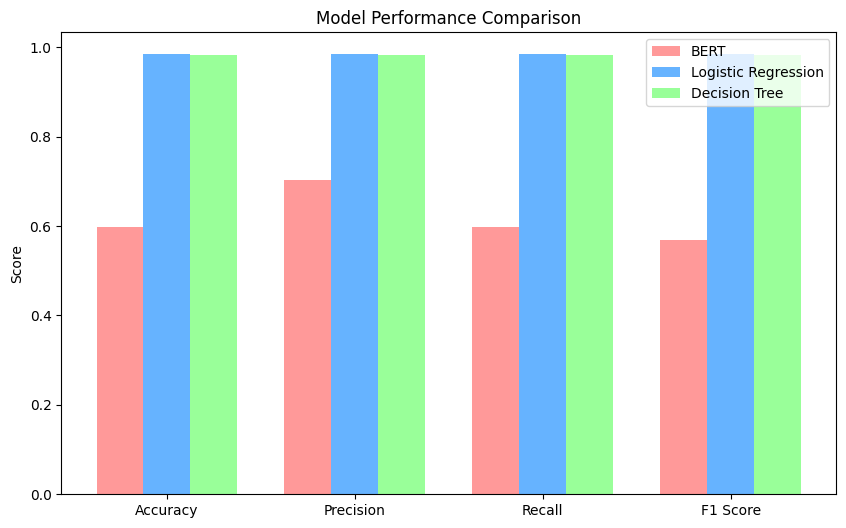

In [40]:
# Define model names and colors
models = ["BERT", "Logistic Regression", "Decision Tree"]
colors = ["#ff9999", "#66b3ff", "#99ff99"]

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))  # X locations for the groups
width = 0.25  # Bar width

for i in range(len(models)):
    ax.bar(x + i * width, scores[i], width, label=models[i], color=colors[i])

# Labels and titles
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend()

# Show plot
plt.show()

<ipython-input-41-1953d059a0b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


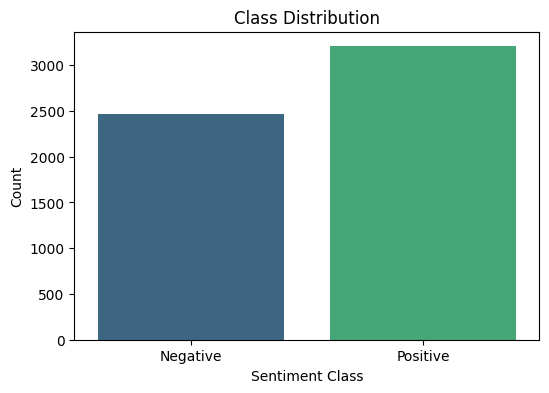

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


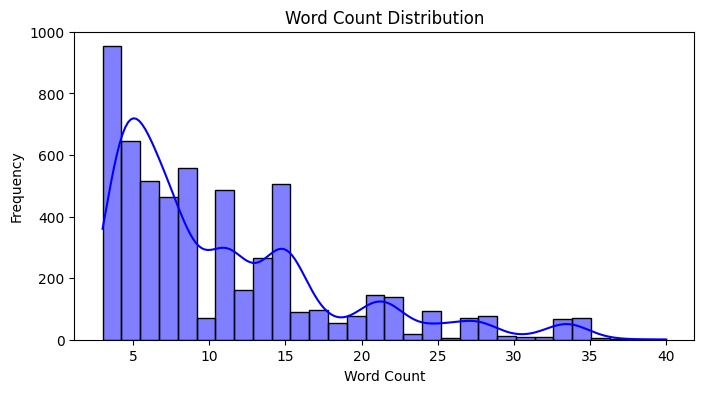

In [42]:

# Word count distribution
df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 4))
sns.histplot(df['word_count'], kde=True, bins=30, color='blue')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


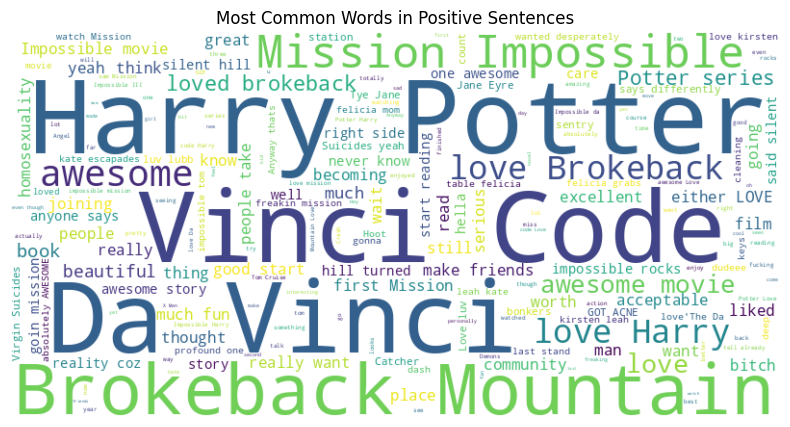

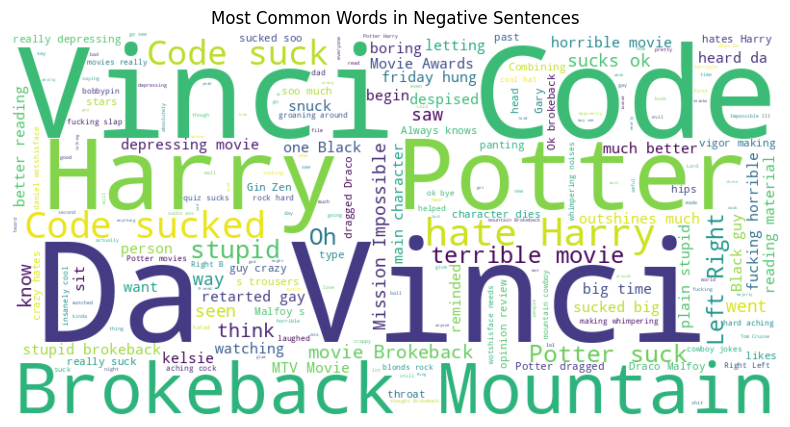

In [43]:

from collections import Counter
from wordcloud import WordCloud

# Most common words for each class
positive_words = ' '.join(df[df['label'] == 1]['sentence']).split()
negative_words = ' '.join(df[df['label'] == 0]['sentence']).split()

# Positive word cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Positive Sentences')
plt.axis('off')
plt.show()

# Negative word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Negative Sentences')
plt.axis('off')
plt.show()


<ipython-input-44-59dd49d8a7b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='word_count', data=df, palette='Set2')


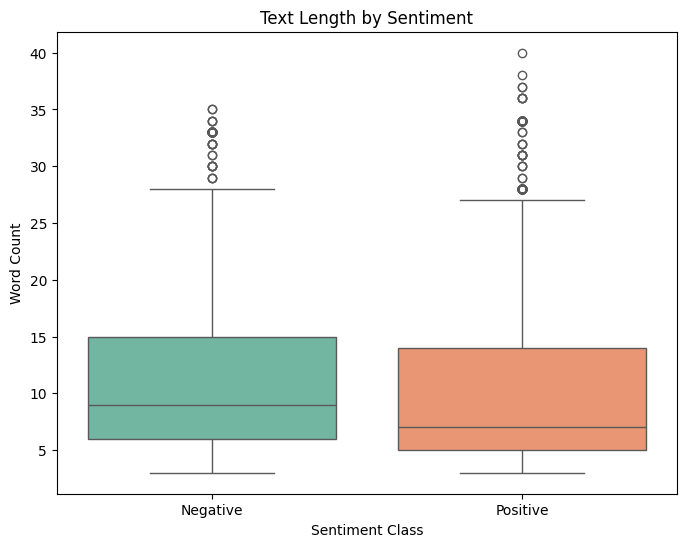

In [44]:

# Boxplot for text length by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='word_count', data=df, palette='Set2')
plt.title('Text Length by Sentiment')
plt.xlabel('Sentiment Class')
plt.ylabel('Word Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()
